In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import mediapipe as mp
import cv2

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_hands = mp.solutions.hands

In [9]:
# real time webcam feed 
cap = cv2.VideoCapture(0) # getting the video capture device number varies from computer to computer 

# opening holistic model and running, setting detection and tracking confidence to 50% 
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    while cap.isOpened(): # looping while the capture frame is open 
        ret, frame = cap.read() # while the reading the feed from webcam

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
        

        cv2.imshow('Holistic Model Detections', cv2.flip(image, 1)) # render the results from the screen
        if cv2.waitKey(10) & 0xFF == ord('q'):  # checking if we are breaking out of the loop
            break 

        
cap.release() # release the camera
cv2.destroyAllWindows() # destroy the windows

KeyboardInterrupt: 

In [ ]:
directory = os.getcwd()
Image_Files = []
signs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
datapoints = []

In [ ]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

        path = os.path.join('Train_Alphabet', 'A', '0aff0fc7-568a-40a3-b510-0584d817cd01.rgb_0000.png')
        image = cv2.flip(cv2.imread(path), 1)
        # print(type(image))
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        annotated_image = image.copy
        try: 
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS)
            plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        except TypeError:
            pass
        
        

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
landmarks = ['class']
for val in range(1, 22):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

P [3.07361438e-03 2.34840842e-14 1.08148573e-23 1.63428055e-09
 6.34287197e-12 3.41310493e-06 6.52521369e-06 1.01678742e-15
 1.14792462e-17 4.03102580e-05 1.43507814e-04 8.53375903e-04
 1.11467848e-10 6.87730079e-08 9.90972641e-18 9.94697420e-01
 8.35594134e-04 4.85645353e-18 1.77768484e-23 8.30159560e-12
 4.57289597e-10 2.71740174e-06 3.36057339e-09 7.71151563e-12
 1.96810847e-05 3.23766789e-04]


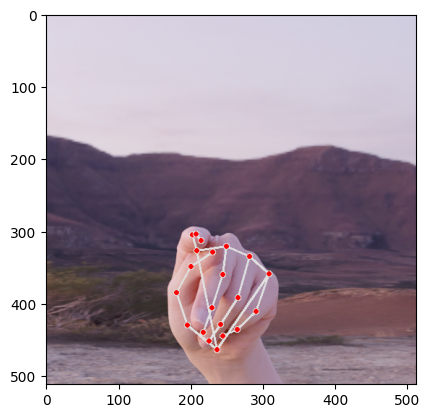

In [ ]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
        img_name = '0ff25073-87d7-4b2e-b1f7-7e3ad75968fc.rgb_0000.png'
        path = os.path.join('Train_Alphabet', 'P', img_name)
        image = cv2.flip(cv2.imread(path), 1)
        
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        annotated_image = image.copy()

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                lm = hand_landmarks.landmark
                row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lm]).flatten())
                X = pd.DataFrame([row])
                asl_class = model.predict(X)[0]
                asl_prob = model.predict_proba(X)[0]
                print(asl_class, asl_prob)
        else:
            print('skip')
            dest = os.path.join('bad_data', img)
            os.rename(path, dest)
            
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    
        
        

In [ ]:
import csv
data_landmarks = []

for folder in os.listdir('Train_Alphabet'):
    folder_path = os.path.join('Train_Alphabet', folder)
    for img in os.listdir(folder_path):
        with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5) as hands:

            path = os.path.join('Train_Alphabet', folder , img)
            image = cv2.flip(cv2.imread(path), 1)
            
            results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

            annotated_image = image.copy()

            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                    annotated_image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
                    lm = hand_landmarks.landmark
                    row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lm]).flatten())
                    row.insert(0, folder)
                with open('coords.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
            else:
                print('skip')
                dest = os.path.join('bad_data', img)
                os.rename(path, dest)
        
print(data_landmarks)

skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip


In [ ]:
df = pd.read_csv('coords.csv')
df

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,A,0.474985,0.802982,-6.713039e-07,0.563887,0.747617,-0.052501,0.623874,0.629087,-0.061168,...,0.017479,0.380077,0.564550,-0.027614,0.394993,0.623559,-0.027220,0.416997,0.664266,-0.010681
1,A,0.478458,0.797467,-1.060524e-07,0.565462,0.748020,-0.099795,0.624173,0.647748,-0.136345,...,0.000796,0.390051,0.563333,-0.063356,0.400067,0.630211,-0.063392,0.417835,0.673271,-0.040483
2,A,0.505701,0.771447,-3.260339e-07,0.602702,0.730021,-0.037783,0.650349,0.618428,-0.048037,...,-0.041396,0.458413,0.567276,-0.093248,0.473051,0.633881,-0.089741,0.478321,0.676022,-0.071900
3,A,0.490151,0.807673,-9.021290e-07,0.385462,0.745768,-0.022131,0.325846,0.634145,-0.022120,...,-0.004402,0.554062,0.554899,-0.039465,0.534353,0.617602,-0.027429,0.523871,0.665757,-0.005271
4,A,0.492605,0.864490,-8.674032e-07,0.597684,0.794214,-0.062145,0.662340,0.669662,-0.079351,...,0.003362,0.379977,0.590598,-0.050746,0.397699,0.659487,-0.052509,0.423421,0.707820,-0.035250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,Z,0.461151,0.806463,4.894274e-07,0.544662,0.776773,-0.012590,0.592733,0.738571,-0.066553,...,-0.188597,0.499353,0.669927,-0.232749,0.511919,0.719710,-0.206951,0.484687,0.730791,-0.182142
2318,Z,0.448218,0.787598,3.917152e-07,0.437006,0.762844,-0.130044,0.468864,0.718665,-0.181429,...,-0.018269,0.647696,0.668529,-0.087409,0.623648,0.714635,-0.097402,0.596550,0.717383,-0.088788
2319,Z,0.519447,0.814772,4.265618e-07,0.569968,0.780381,-0.103986,0.567230,0.716687,-0.159469,...,-0.063011,0.377108,0.674721,-0.124037,0.413169,0.716423,-0.117280,0.436929,0.722619,-0.095687
2320,Z,0.475333,0.835086,-2.985359e-07,0.427444,0.796819,-0.053775,0.413916,0.728862,-0.084103,...,-0.083604,0.621703,0.684352,-0.128524,0.579343,0.728668,-0.118185,0.546193,0.735297,-0.102884


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train.values, y_train)
    fit_models[algo] = model

C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
fit_models['rc'].predict(X_test)

C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array(['W', 'W', 'R', 'A', 'C', 'F', 'R', 'S', 'L', 'V', 'E', 'Z', 'W',
       'M', 'G', 'J', 'A', 'J', 'P', 'R', 'R', 'A', 'Y', 'V', 'R', 'O',
       'J', 'S', 'F', 'W', 'Y', 'T', 'V', 'U', 'H', 'J', 'V', 'N', 'N',
       'C', 'Y', 'J', 'K', 'W', 'E', 'F', 'U', 'B', 'K', 'T', 'G', 'N',
       'B', 'B', 'X', 'J', 'A', 'L', 'I', 'C', 'J', 'N', 'M', 'X', 'T',
       'C', 'G', 'W', 'N', 'A', 'L', 'I', 'S', 'E', 'H', 'V', 'E', 'N',
       'A', 'K', 'L', 'Y', 'C', 'N', 'A', 'A', 'I', 'W', 'C', 'I', 'F',
       'X', 'S', 'W', 'Z', 'J', 'Z', 'C', 'C', 'J', 'W', 'Q', 'C', 'E',
       'R', 'S', 'X', 'M', 'Z', 'L', 'V', 'G', 'Z', 'V', 'R', 'T', 'K'],
      dtype='<U1')

In [ ]:
y_test

2020    W
1991    W
1549    R
47      A
210     C
       ..
2249    Z
1941    V
1572    R
1797    T
937     K
Name: class, Length: 117, dtype: object

In [ ]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9829059829059829
rc 0.9572649572649573
rf 0.9914529914529915
gb 0.9658119658119658


C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\rache\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScale

In [ ]:
import pickle
with open('asl.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)

In [4]:
import pickle
with open('asl.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
# real time webcam feed 
cap = cv2.VideoCapture(0) # getting the video capture device number varies from computer to computer 

# opening holistic model and running, setting detection and tracking confidence to 50% 
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    while cap.isOpened(): # looping while the capture frame is open 
        ret, frame = cap.read() # while the reading the feed from webcam

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                try:
                    lm = hand_landmarks.landmark
                    row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lm]).flatten())
                    
                    X = pd.DataFrame([row])
                    asl_class = model.predict(X)[0]
                    asl_prob = model.predict_proba(X)[0]

                    # Get status box
                    cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
                    
                    # Display Class
                    cv2.putText(image, 'CLASS'
                                , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, asl_class.split(' ')[0]
                                , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                    
                    # Display Probability
                    cv2.putText(image, 'PROB'
                                , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, str(round(asl_prob[np.argmax(asl_prob)],2))
                                , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                except:
                    pass
        
        
        

        cv2.imshow('Holistic Model Detections', image) # render the results from the screen
        if cv2.waitKey(10) & 0xFF == ord('q'):  # checking if we are breaking out of the loop
            break 

        
cap.release() # release the camera
cv2.destroyAllWindows() # destroy the windows